<a href="https://colab.research.google.com/github/Rupasunkara125/OCTANET_NOVEMBER/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv("/content/IMDB Dataset.csv")

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(50000, 2)

In [ ]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
def clean_review(review):
  str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
  return str

In [ ]:
data['review']=data['review'].apply(clean_review)

In [ ]:
from wordcloud import WordCloud

In [ ]:
reviews = ' '.join(data.loc[data['sentiment'] == 'negative', 'review'].astype(str))

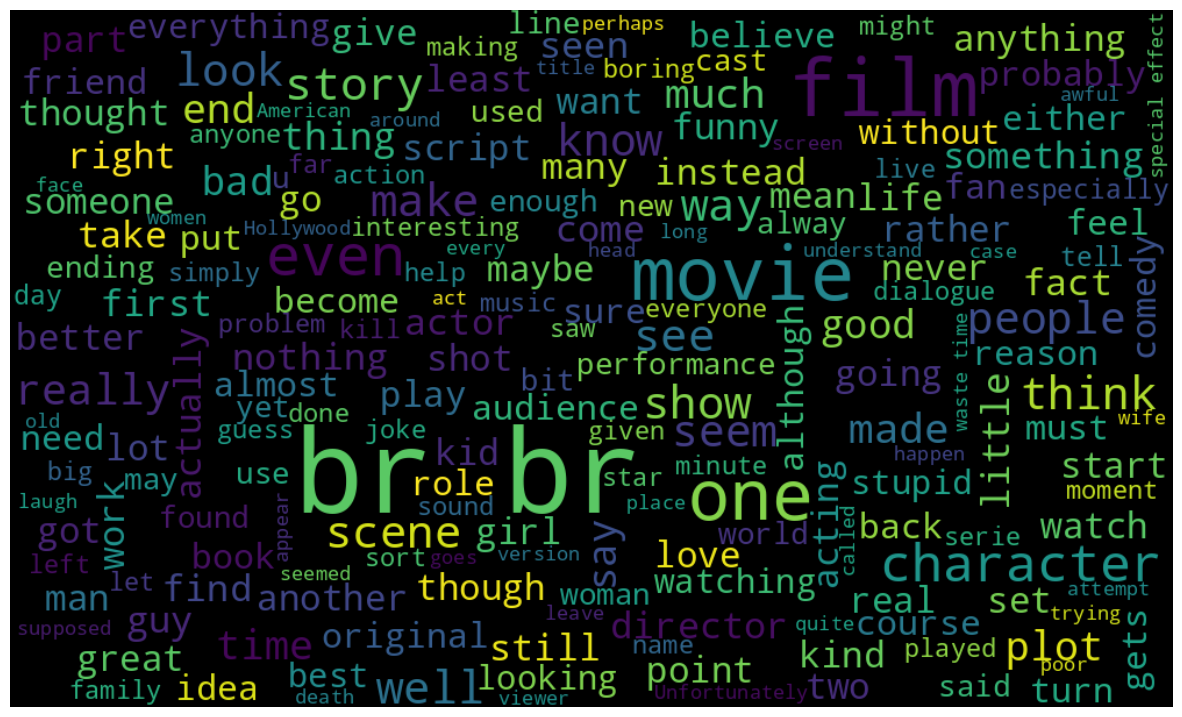

In [ ]:
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
reviews = ' '.join(data.loc[data['sentiment'] == 'positive', 'review'].astype(str))

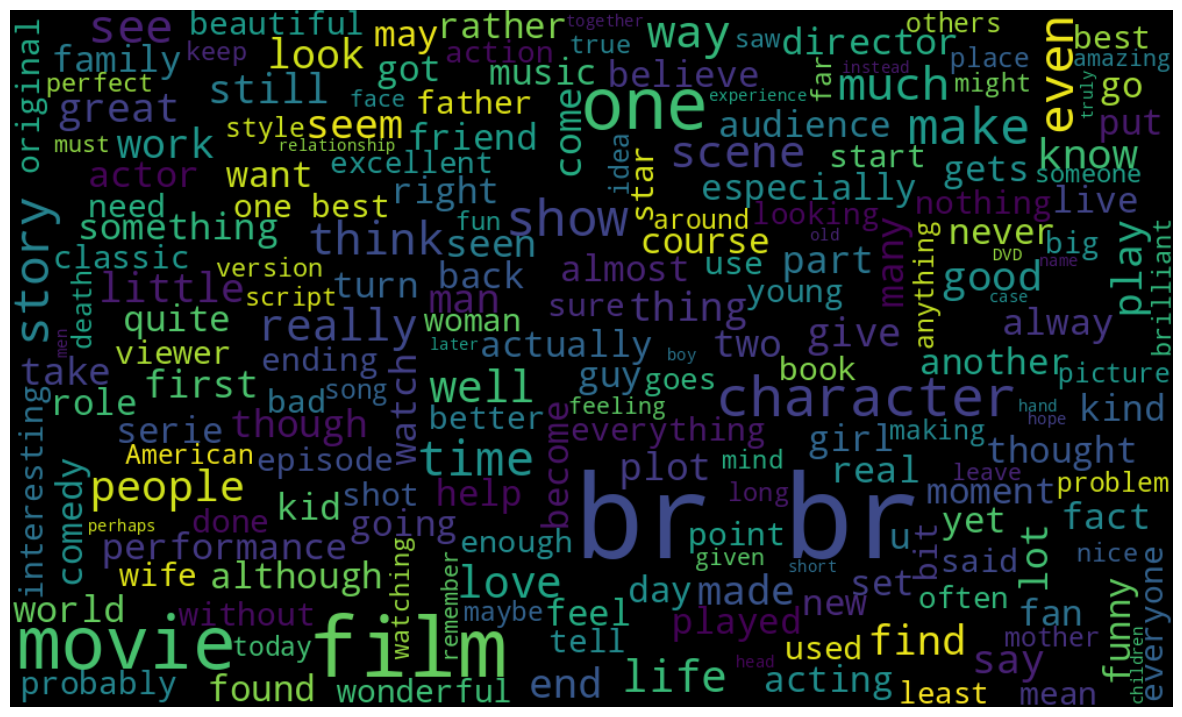

In [ ]:
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv=TfidfVectorizer(max_features=3000)

In [ ]:
reviews=cv.fit_transform(data['review']).toarray()

In [ ]:
data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])

/tmp/ipython-input-19-1991448599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['sentiment'] = data['sentiment'].replace(['positive', 'negative'], [1, 0])


In [ ]:
data

,review,sentiment
0,One reviewers mentioned watching 1 Oz episode ...,1
1,wonderful little production. <br /><br />The f...,1
2,thought wonderful way spend time hot summer we...,1
3,Basically there's family little boy (Jake) thi...,0
4,"Petter Mattei's ""Love Time Money"" visually stu...",1
...,...,...
49995,thought movie right good job. creative origina...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,Catholic taught parochial elementary schools n...,0
49998,going disagree previous comment side Maltin on...,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(reviews,data['sentiment'],test_size=0.2)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
Predict=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Predict)

0.879

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [ ]:
cm=confusion_matrix(y_test,Predict,labels=model.classes_)

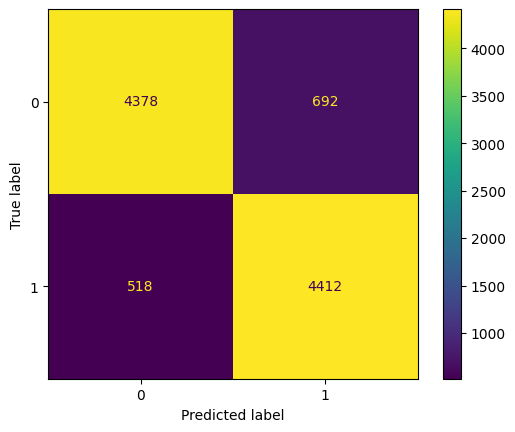

In [ ]:
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [ ]:
import pickle as pk

In [ ]:
pk.dump(model,open('model.pkl','wb'))

In [ ]:
pk.dump(cv,open('scalar.pkl','wb'))

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.125.69.0


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.69.0:8501

⠦⠧⠇⠏⠋⠙⠹your url is: https://moody-paths-unite.loca.lt
2025-07-26 08:01:04.257 `label` got an empty value. This is discouraged for accessibility reasons and may be disallowed in the future by raising an exception. Please provide a non-empty label and hide it with label_visibility if needed.
Stack (most recent call last):
  File "/usr/lib/python3.11/threading.py", line 1002, in _bootstrap
    self._bootstrap_inner()
  File "/usr/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.11/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 378, in _run_script_thread
    self._run_script(request.rerun_data)
  File "/usr/local/lib/python3.11/dis